In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from datetime import datetime
warnings.filterwarnings('ignore')


In [2]:
df = pd.read_csv('data/netflix_titles.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


### Remove missing/NaN values from the dataframe

In [3]:
df.isna().sum()
df = df.dropna()

In [4]:
df['listed_in'].unique()

array(['Dramas, Independent Movies, International Movies',
       'British TV Shows, Reality TV', 'Comedies, Dramas',
       'Dramas, International Movies',
       'Comedies, International Movies, Romantic Movies', 'Comedies',
       'Horror Movies, Sci-Fi & Fantasy', 'Thrillers',
       'Action & Adventure, Dramas',
       'Action & Adventure, Classic Movies, Dramas',
       'Dramas, Horror Movies, Thrillers',
       'Action & Adventure, Horror Movies, Thrillers',
       'Action & Adventure', 'Dramas, Thrillers',
       'Action & Adventure, Anime Features, International Movies',
       'Action & Adventure, Comedies, Dramas',
       'Sci-Fi & Fantasy, Thrillers',
       'Children & Family Movies, Comedies',
       'Documentaries, Music & Musicals',
       'Children & Family Movies, Dramas',
       'Dramas, International Movies, Thrillers',
       'Dramas, Romantic Movies', 'Comedies, Dramas, Independent Movies',
       'Dramas, International Movies, Romantic Movies', 'Dramas',
       '

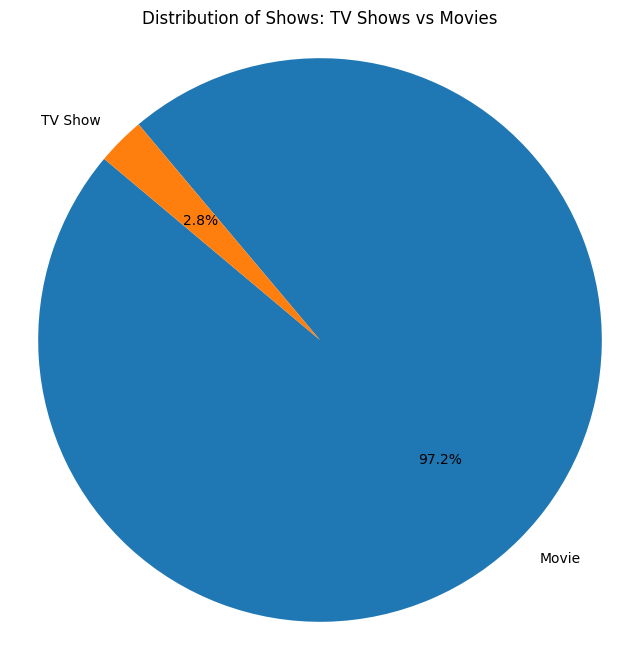

In [5]:
show_counts = df['type'].value_counts()

# Data for the pie chart
labels = show_counts.index
sizes = show_counts.values

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Distribution of Shows: TV Shows vs Movies')
plt.show()

In [6]:
df['type'].value_counts().index

Index(['Movie', 'TV Show'], dtype='object', name='type')

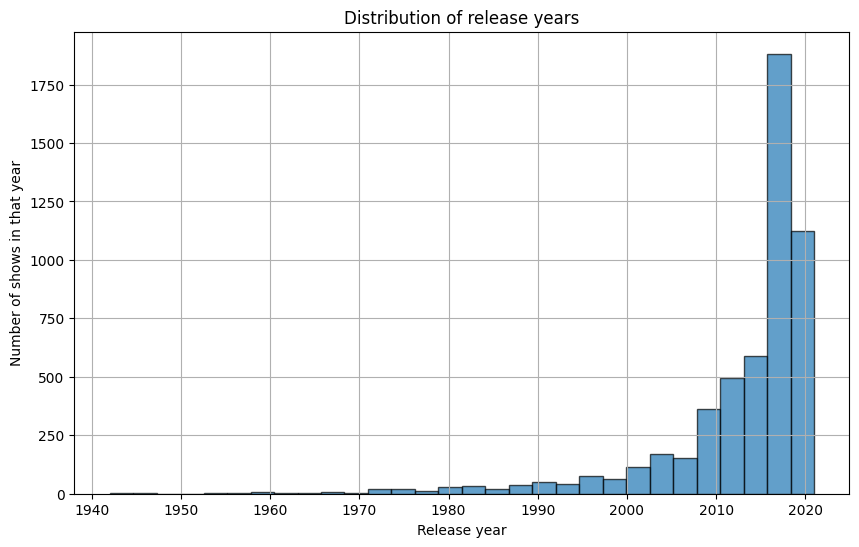

In [7]:
plt.figure(figsize=(10, 6))
plt.hist(df['release_year'],bins=30, edgecolor = 'black', alpha = 0.7)
plt.ylabel('Number of shows in that year')
plt.xlabel('Release year')
plt.title('Distribution of release years')
plt.grid(True)
plt.show()

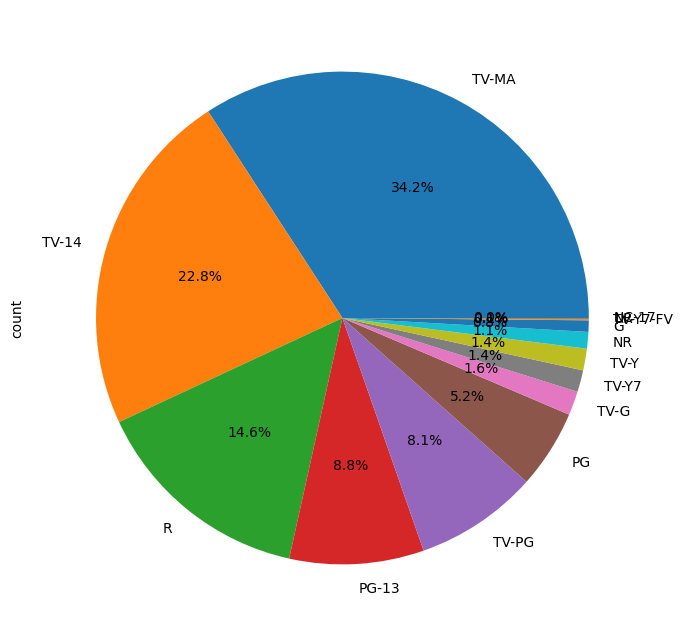

In [8]:
# df['rating'].value_counts().plot.pie(autopct='%1.1f%%',shadow=False,figsize=(10,8))
df['rating'].value_counts().plot(kind='pie', autopct = '%1.1f%%',figsize=(10,8))
plt.show()

### Count and visualize the distribution of different genres.

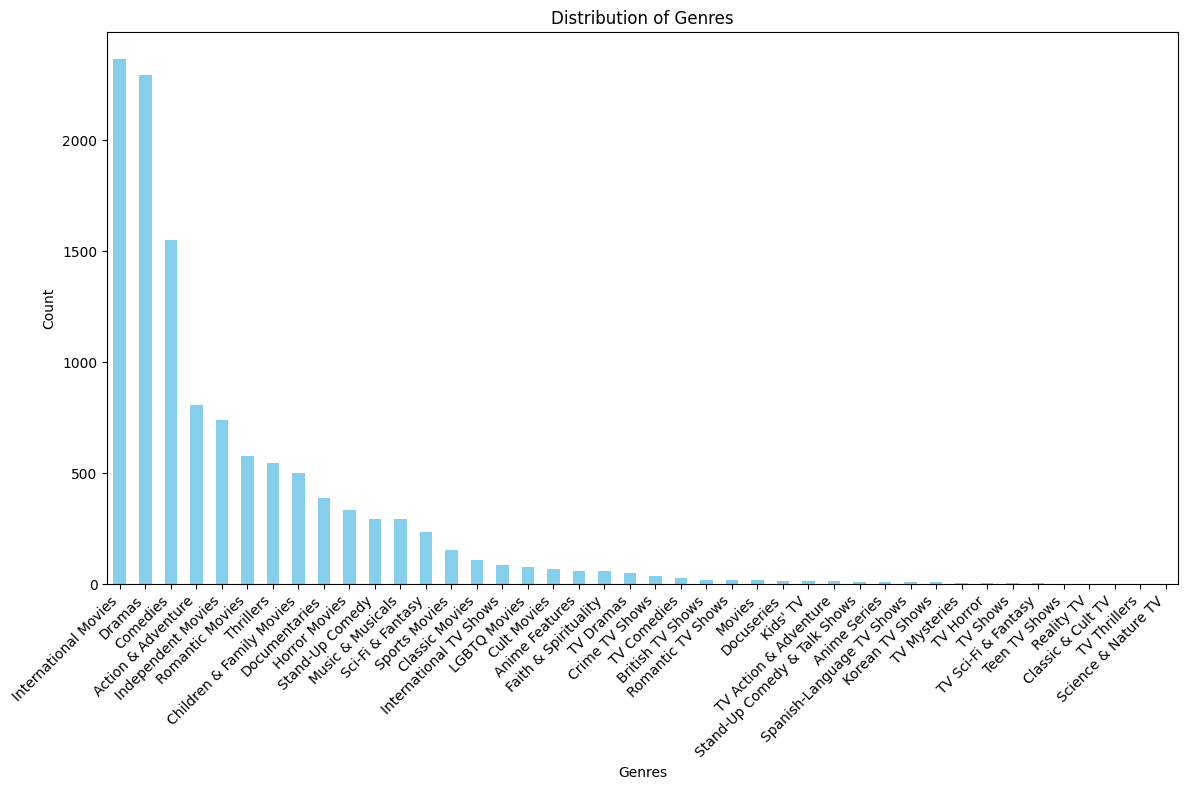

In [9]:
df['genres'] = df['listed_in'].apply(lambda x: x.split(', '))

# Create a list of all genres
all_genres = [genre for sublist in df['genres'] for genre in sublist]

genre_counts = pd.Series(all_genres).value_counts()

plt.figure(figsize=(12, 8))
genre_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Genres')
plt.ylabel('Count')
plt.title('Distribution of Genres')
plt.xticks(rotation=45, ha='right', fontsize=10)  # Rotate and align the labels
plt.tight_layout()  # Automatically adjust subplot parameters to give specified padding
plt.show()

### Top 10 directors by the number of shows/movies.

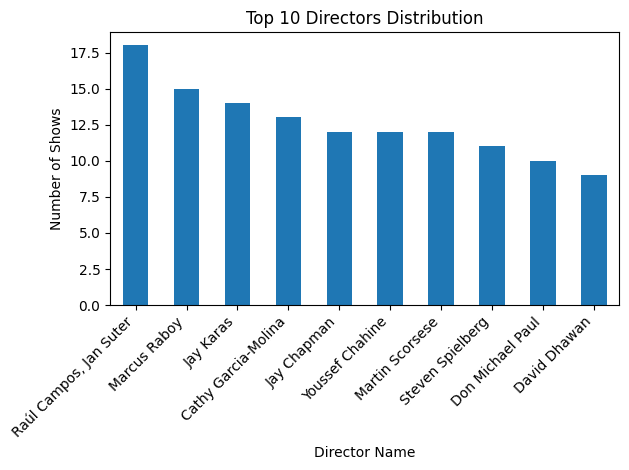

In [10]:
directors = df.groupby('director').size()
top_dir = directors.sort_values(ascending=False).head(10)
# top_dir.plot(kind='bar',title='Top 10 Directors distribution', xlabel='Director name', ylabel='Number of shows')
ax = top_dir.plot(kind='bar', )
plt.xlabel('Director Name')
plt.ylabel('Number of Shows')
plt.title('Top 10 Directors Distribution')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')  # Rotate x-axis labels by 45 degrees
plt.tight_layout()
plt.show()


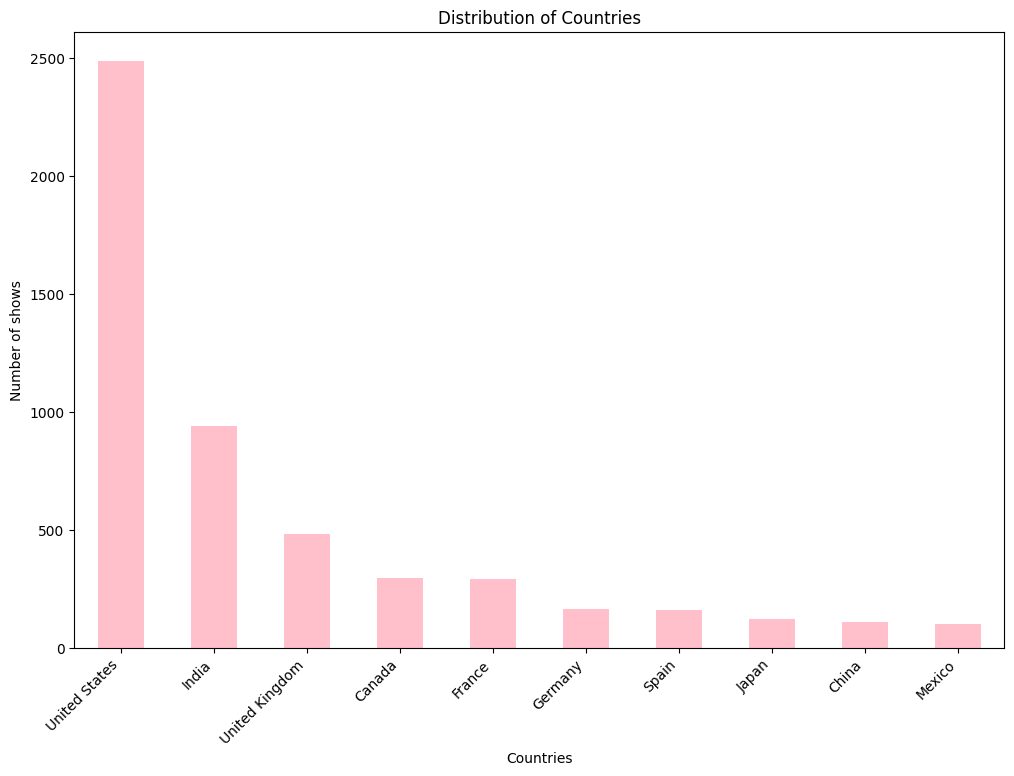

In [11]:
df['countries'] = df['country'].apply(lambda x: x.split(', '))

# Create a list of all countries
all_countries = [country for sublist in df['countries'] for country in sublist]

# Count the occurrences of each country
country_counts = pd.Series(all_countries).value_counts().head(10)

# Plotting the country counts
plt.figure(figsize=(12, 8))
country_counts.plot(kind='bar', color='pink')
plt.xlabel('Countries')
plt.ylabel('Number of shows')
plt.title('Distribution of Countries')
plt.xticks(rotation=45, ha='right', fontsize=10)  
# plt.tight_layout()  
plt.show()

Text(0, 0.5, 'Number of shows')

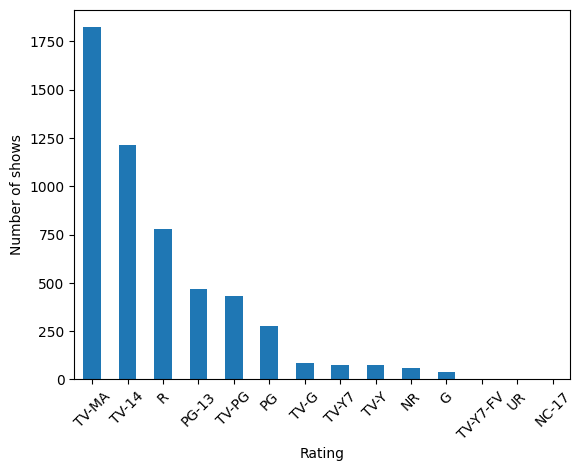

In [12]:
df['rating'].value_counts().plot(kind='bar')
plt.xlabel('Rating')
plt.xticks(rotation = 45)
plt.ylabel('Number of shows')

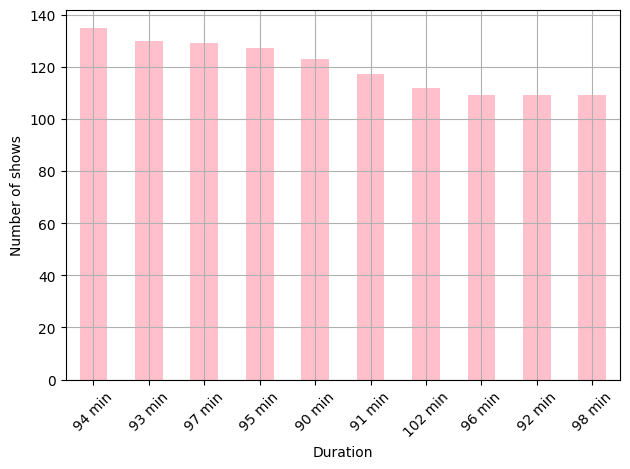

In [13]:
df['duration'].value_counts().head(10).plot(kind='bar',color='pink')
plt.xlabel('Duration')
plt.ylabel('Number of shows')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

In [14]:
df['date_added'].head(10)

7     September 24, 2021
8     September 24, 2021
9     September 24, 2021
12    September 23, 2021
24    September 21, 2021
27    September 20, 2021
28    September 19, 2021
29    September 19, 2021
38    September 16, 2021
41    September 16, 2021
Name: date_added, dtype: object

In [19]:
dates = df['date_added']
dates = [d.lstrip() for d in dates] # removing leading spaces in the dates
new_dates = list(map(lambda x: datetime.strptime(x,'%B %d, %Y'), dates))
new_dates[0].month
df['date_added'] = new_dates # change the date_added datetime format
df.head()

9

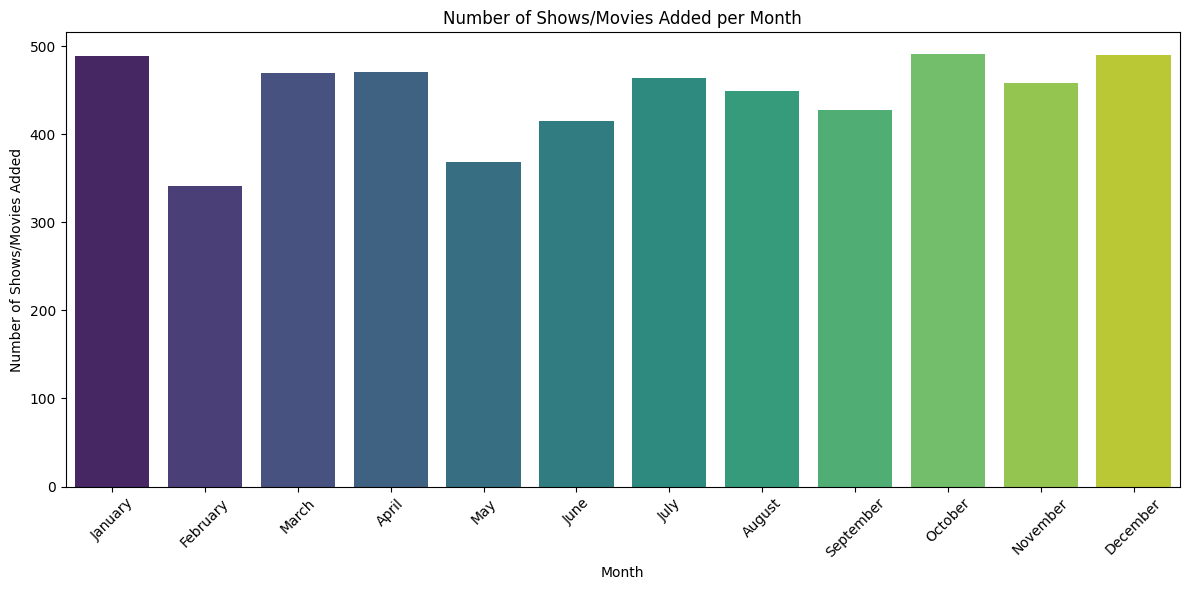

In [25]:
df['date_added'] = pd.to_datetime(df['date_added'])
df['month_added'] = df['date_added'].dt.month

monthly_counts = df.groupby('month_added').size()

month_names = ['January', 'February', 'March', 'April', 'May', 'June', 'July',
               'August', 'September', 'October', 'November', 'December']

plt.figure(figsize=(12, 6))
sns.barplot(x=monthly_counts.index, y=monthly_counts.values, palette='viridis')
plt.xlabel('Month')
plt.ylabel('Number of Shows/Movies Added')
plt.title('Number of Shows/Movies Added per Month')
plt.xticks(ticks=range(12), labels=month_names, rotation=45)
plt.tight_layout()
plt.show()

<bound method GroupBy.size of <pandas.core.groupby.generic.DataFrameGroupBy object at 0x0000017EF5780B50>>

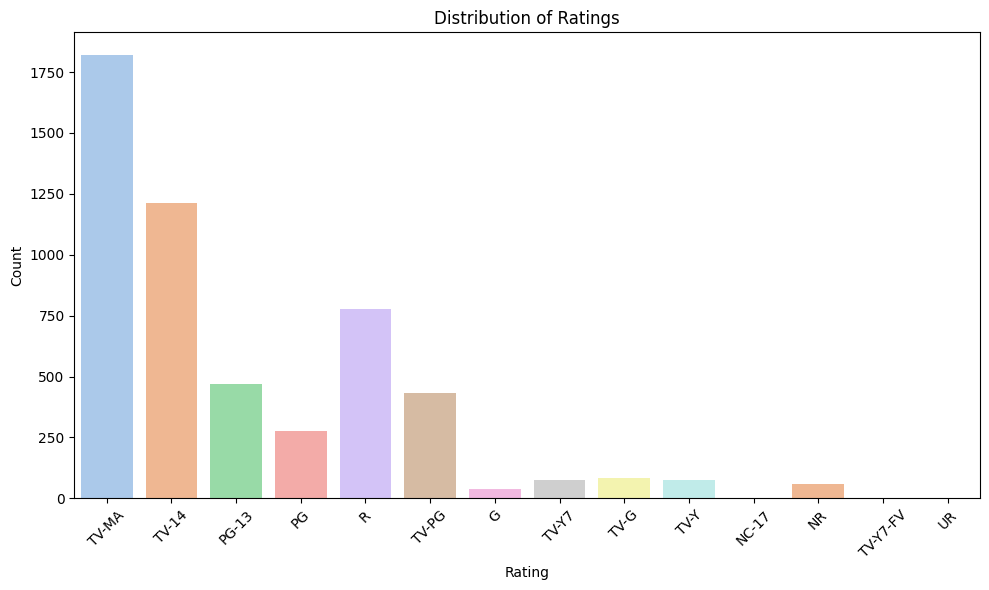

In [29]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='rating', palette='pastel')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Distribution of Ratings')
plt.xticks(rotation=45) 
plt.tight_layout()
plt.show()

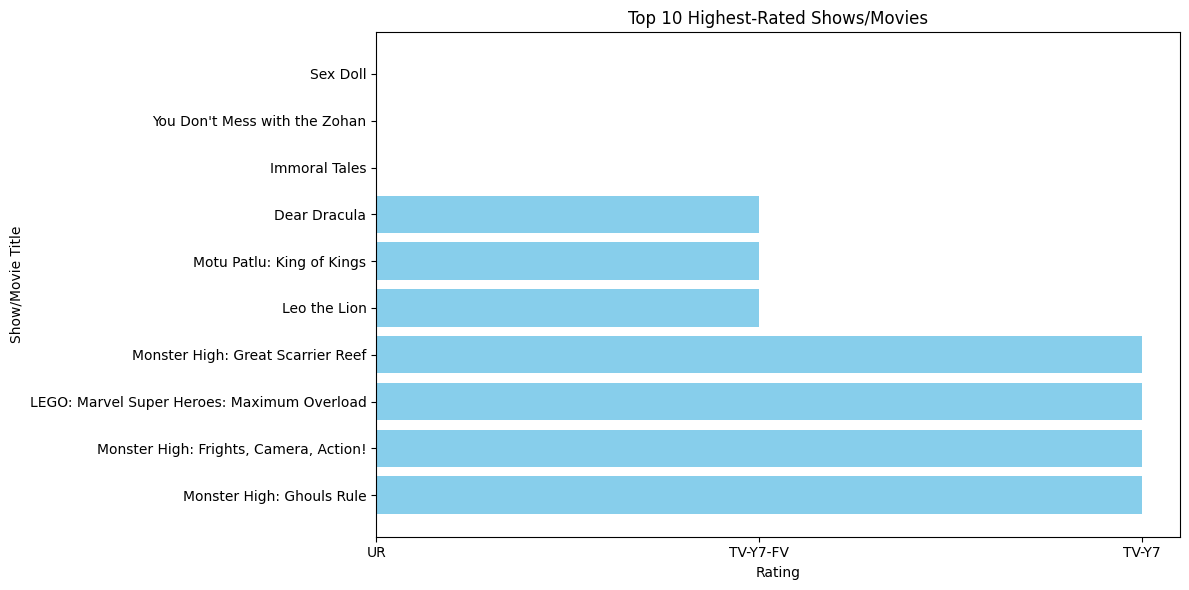

In [30]:
sorted_df = df.sort_values(by='rating', ascending=False)

top_n = 10
top_rated = sorted_df.head(top_n)

plt.figure(figsize=(12, 6))
plt.barh(top_rated['title'], top_rated['rating'], color='skyblue')
plt.xlabel('Rating')
plt.ylabel('Show/Movie Title')
plt.title('Top {} Highest-Rated Shows/Movies'.format(top_n))
plt.gca().invert_yaxis() 
plt.tight_layout()
plt.show()

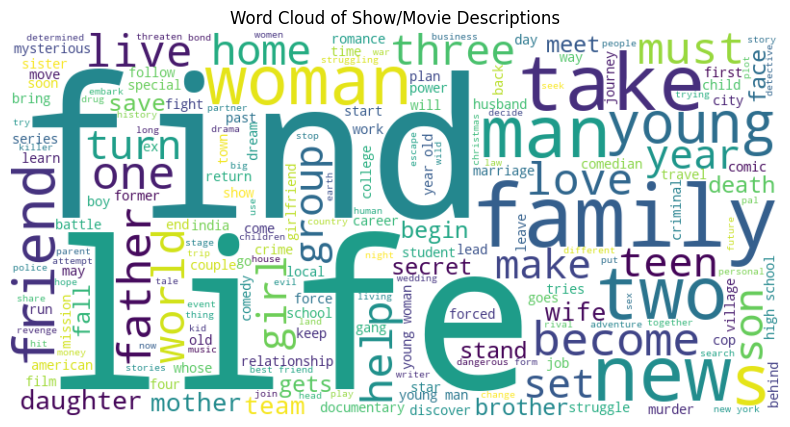

In [34]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS
all_descriptions = ' '.join(df['description'].dropna())

stopwords = set(STOPWORDS)
processed_text = ' '.join([word.lower() for word in all_descriptions.split() if word.lower() not in stopwords])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(processed_text)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  
plt.title('Word Cloud of Show/Movie Descriptions')
plt.show()

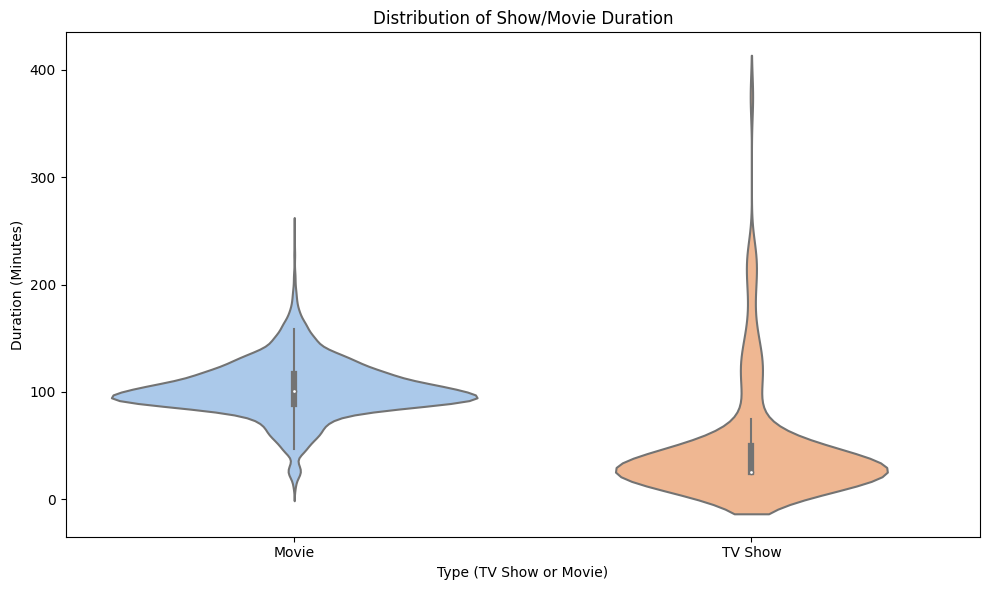

In [44]:
def duration_to_minutes(duration):
    if 'min' in duration:
        return int(duration.split(' ')[0])
    elif 'Season' in duration:
        return int(duration.split(' ')[0]) * 25  # Assuming 1 season is approximately 25 episodes

df['duration_minutes'] = df['duration'].apply(duration_to_minutes)

plt.figure(figsize=(10, 6))
sns.violinplot(x='type', y='duration_minutes', data=df, palette='pastel')
plt.xlabel('Type (TV Show or Movie)')
plt.ylabel('Duration (Minutes)')
plt.title('Distribution of Show/Movie Duration')
plt.tight_layout()
plt.show()
